Analysis


BBC's trend ranged from -0.6705 to 0.891; a range of 1.5615.

CBSNews' trend ranged from -0.5719 to 0.7003; a range of 1.2722.

CNN's trend ranged from -0.6486 to 0.5106; a range of 1.1592.

FoxNews' trend ranged from -0.743 to 0.7351; a range of 1.4781.

NYTimes' trend ranged from -0.7717 to 0.6369; a range of 1.4086.

Sentiment values differ based on corresponding events; 

All news feeds at certain point, showed either high negative or high positive trend. 
   
In average, BBC & CBS showed positive trends while CNN & Fox showed negative trends. 

NYT showed a slightly positive trend closest to the neutral line.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [2]:
from configtwitter import *
auth = tweepy.OAuthHandler(api_key, api_s_key)
auth.set_access_token(access_token, access_s_token)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
target_user = ["@BBC","@CBSNews","@CNN","@FoxNews","@nytimes"]

In [5]:
df = pd.DataFrame(columns = ['account_name',
                             'tweet','time_posted',
                             'compound_score',
                             'positive_score',
                             'neutral_score',
                             'negative_score'])

In [6]:
count = 0
for user in target_user:
    
    for i in range(5):

        public_tweets = api.user_timeline(user)

        for ii in range(len(public_tweets)):
            try:
                df.set_value(count,
                             'account_name',
                             public_tweets[ii]["user"]["screen_name"])
                df.set_value(count,
                             'tweet',
                             public_tweets[ii]["text"])
                df.set_value(count,
                             'time_posted',
                             public_tweets[i]["created_at"])
                df.set_value(count,
                             'compound_score',
                             analyzer.polarity_scores(public_tweets[ii]["text"])["compound"])
                df.set_value(count,
                             'positive_score',
                             analyzer.polarity_scores(public_tweets[ii]["text"])["pos"])
                df.set_value(count,
                             'neutral_score',
                             analyzer.polarity_scores(public_tweets[ii]["text"])["neu"])
                df.set_value(count,
                             'negative_score',
                             analyzer.polarity_scores(public_tweets[ii]["text"])["neg"])
            except:
                print('tweet #{} failed'.format(count+1-(100*target_user.index(user))))
                break
            count += 1
            print('{} tweet #{} successful'.format(public_tweets[ii]['user']['screen_name'],(count-(100*target_user.index(user)))))

BBC tweet #1 successful
BBC tweet #2 successful
BBC tweet #3 successful
BBC tweet #4 successful
BBC tweet #5 successful
BBC tweet #6 successful
BBC tweet #7 successful
BBC tweet #8 successful
BBC tweet #9 successful
BBC tweet #10 successful
BBC tweet #11 successful
BBC tweet #12 successful
BBC tweet #13 successful
BBC tweet #14 successful
BBC tweet #15 successful
BBC tweet #16 successful
BBC tweet #17 successful
BBC tweet #18 successful
BBC tweet #19 successful
BBC tweet #20 successful
BBC tweet #21 successful
BBC tweet #22 successful
BBC tweet #23 successful
BBC tweet #24 successful
BBC tweet #25 successful
BBC tweet #26 successful
BBC tweet #27 successful
BBC tweet #28 successful
BBC tweet #29 successful
BBC tweet #30 successful
BBC tweet #31 successful
BBC tweet #32 successful
BBC tweet #33 successful
BBC tweet #34 successful
BBC tweet #35 successful
BBC tweet #36 successful
BBC tweet #37 successful
BBC tweet #38 successful
BBC tweet #39 successful
BBC tweet #40 successful
BBC tweet

FoxNews tweet #21 successful
FoxNews tweet #22 successful
FoxNews tweet #23 successful
FoxNews tweet #24 successful
FoxNews tweet #25 successful
FoxNews tweet #26 successful
FoxNews tweet #27 successful
FoxNews tweet #28 successful
FoxNews tweet #29 successful
FoxNews tweet #30 successful
FoxNews tweet #31 successful
FoxNews tweet #32 successful
FoxNews tweet #33 successful
FoxNews tweet #34 successful
FoxNews tweet #35 successful
FoxNews tweet #36 successful
FoxNews tweet #37 successful
FoxNews tweet #38 successful
FoxNews tweet #39 successful
FoxNews tweet #40 successful
FoxNews tweet #41 successful
FoxNews tweet #42 successful
FoxNews tweet #43 successful
FoxNews tweet #44 successful
FoxNews tweet #45 successful
FoxNews tweet #46 successful
FoxNews tweet #47 successful
FoxNews tweet #48 successful
FoxNews tweet #49 successful
FoxNews tweet #50 successful
FoxNews tweet #51 successful
FoxNews tweet #52 successful
FoxNews tweet #53 successful
FoxNews tweet #54 successful
FoxNews tweet 

In [7]:
df.to_csv("twitternews.csv", encoding = "utf-8", index = False)

In [8]:
df.head()

,account_name,tweet,time_posted,compound_score,positive_score,neutral_score,negative_score
0,BBC,RT @5liveSport: FT:\n\n#URU 2 - 1 #POR\n\nPort...,Sat Jun 30 19:56:38 +0000 2018,0.5707,0.15,0.85,0
1,BBC,RT @bbcthree: Would you criticise a stranger l...,Sat Jun 30 19:56:38 +0000 2018,-0.5106,0.153,0.491,0.356
2,BBC,With plastic protests around the country and a...,Sat Jun 30 19:56:38 +0000 2018,-0.6705,0,0.766,0.234
3,BBC,RT @BBCWorld: Unesco announces new heritage si...,Sat Jun 30 19:56:38 +0000 2018,0,0,1,0
4,BBC,😨👀 This AI software uses wireless signals to w...,Sat Jun 30 19:56:38 +0000 2018,0,0,1,0


In [9]:
bbc_comp = list(df.loc[df['account_name'] == 'BBC']['compound_score'])[::-1]
bbc_comp

[0.0,
 0.0,
 0.0,
 -0.4404,
 0.1007,
 0.4404,
 0.0,
 0.891,
 0.5719,
 0.0,
 0.5509,
 -0.3818,
 0.0,
 0.0,
 0.3802,
 0.0,
 0.0,
 -0.6705,
 -0.5106,
 0.5707,
 0.0,
 0.0,
 0.0,
 -0.4404,
 0.1007,
 0.4404,
 0.0,
 0.891,
 0.5719,
 0.0,
 0.5509,
 -0.3818,
 0.0,
 0.0,
 0.3802,
 0.0,
 0.0,
 -0.6705,
 -0.5106,
 0.5707,
 0.0,
 0.0,
 0.0,
 -0.4404,
 0.1007,
 0.4404,
 0.0,
 0.891,
 0.5719,
 0.0,
 0.5509,
 -0.3818,
 0.0,
 0.0,
 0.3802,
 0.0,
 0.0,
 -0.6705,
 -0.5106,
 0.5707,
 0.0,
 0.0,
 0.0,
 -0.4404,
 0.1007,
 0.4404,
 0.0,
 0.891,
 0.5719,
 0.0,
 0.5509,
 -0.3818,
 0.0,
 0.0,
 0.3802,
 0.0,
 0.0,
 -0.6705,
 -0.5106,
 0.5707,
 0.0,
 0.0,
 0.0,
 -0.4404,
 0.1007,
 0.4404,
 0.0,
 0.891,
 0.5719,
 0.0,
 0.5509,
 -0.3818,
 0.0,
 0.0,
 0.3802,
 0.0,
 0.0,
 -0.6705,
 -0.5106,
 0.5707]

In [10]:
print(max(bbc_comp))
print(min(bbc_comp))
print(max(bbc_comp)-min(bbc_comp))

0.891
-0.6705
1.5615


In [11]:
cbs_comp = list(df.loc[df['account_name'] == 'CBSNews']['compound_score'])[::-1]
cbs_comp

[0.4215,
 0.3612,
 0.0,
 0.7003,
 0.0,
 -0.5267,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.2263,
 0.0,
 -0.5719,
 0.0,
 0.4215,
 0.0,
 0.4927,
 0.5719,
 0.2023,
 0.4019,
 0.4215,
 0.3612,
 0.0,
 0.7003,
 0.0,
 -0.5267,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.2263,
 0.0,
 -0.5719,
 0.0,
 0.4215,
 0.0,
 0.4927,
 0.5719,
 0.2023,
 0.4019,
 0.4215,
 0.3612,
 0.0,
 0.7003,
 0.0,
 -0.5267,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.2263,
 0.0,
 -0.5719,
 0.0,
 0.4215,
 0.0,
 0.4927,
 0.5719,
 0.2023,
 0.4019,
 0.4215,
 0.3612,
 0.0,
 0.7003,
 0.0,
 -0.5267,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.2263,
 0.0,
 -0.5719,
 0.0,
 0.4215,
 0.0,
 0.4927,
 0.5719,
 0.2023,
 0.4019,
 0.4215,
 0.3612,
 0.0,
 0.7003,
 0.0,
 -0.5267,
 0.0258,
 0.0,
 0.0,
 0.0,
 0.2263,
 0.0,
 -0.5719,
 0.0,
 0.4215,
 0.0,
 0.4927,
 0.5719,
 0.2023,
 0.4019]

In [12]:
print(max(cbs_comp))
print(min(cbs_comp))
print(max(cbs_comp)-min(cbs_comp))

0.7003
-0.5719
1.2722


In [13]:
cnn_comp = list(df.loc[df['account_name'] == 'CNN']['compound_score'])[::-1]
cnn_comp

[-0.4939,
 0.0,
 0.1139,
 0.0,
 -0.0516,
 -0.2263,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 -0.2263,
 -0.6486,
 0.0,
 -0.5994,
 -0.3818,
 0.0,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.1139,
 0.0,
 -0.0516,
 -0.2263,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 -0.2263,
 -0.6486,
 0.0,
 -0.5994,
 -0.3818,
 0.0,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.1139,
 0.0,
 -0.0516,
 -0.2263,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 -0.2263,
 -0.6486,
 0.0,
 -0.5994,
 -0.3818,
 0.0,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.1139,
 0.0,
 -0.0516,
 -0.2263,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 -0.2263,
 -0.6486,
 0.0,
 -0.5994,
 -0.3818,
 0.0,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.1139,
 0.0,
 -0.0516,
 -0.2263,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 -0.2263,
 -0.6486,
 0.0,
 -0.5994,
 -0.3818,
 0.0,
 0.0,
 0.0]

In [14]:
print(max(cnn_comp))
print(min(cnn_comp))
print(max(cnn_comp)-min(cnn_comp))

0.5106
-0.6486
1.1592


In [15]:
fox_comp = list(df.loc[df['account_name'] == 'FoxNews']['compound_score'])[::-1]
fox_comp

[0.0,
 -0.6808,
 0.0,
 -0.6705,
 0.0,
 0.128,
 -0.25,
 -0.743,
 -0.2263,
 0.0,
 0.0,
 0.7351,
 -0.3182,
 -0.6808,
 0.4939,
 0.2368,
 0.0,
 0.6597,
 0.0,
 0.0,
 0.0,
 -0.6808,
 0.0,
 -0.6705,
 0.0,
 0.128,
 -0.25,
 -0.743,
 -0.2263,
 0.0,
 0.0,
 0.7351,
 -0.3182,
 -0.6808,
 0.4939,
 0.2368,
 0.0,
 0.6597,
 0.0,
 0.0,
 0.0,
 -0.6808,
 0.0,
 -0.6705,
 0.0,
 0.128,
 -0.25,
 -0.743,
 -0.2263,
 0.0,
 0.0,
 0.7351,
 -0.3182,
 -0.6808,
 0.4939,
 0.2368,
 0.0,
 0.6597,
 0.0,
 0.0,
 0.0,
 -0.6808,
 0.0,
 -0.6705,
 0.0,
 0.128,
 -0.25,
 -0.743,
 -0.2263,
 0.0,
 0.0,
 0.7351,
 -0.3182,
 -0.6808,
 0.4939,
 0.2368,
 0.0,
 0.6597,
 0.0,
 0.0,
 0.0,
 -0.6808,
 0.0,
 -0.6705,
 0.0,
 0.128,
 -0.25,
 -0.743,
 -0.2263,
 0.0,
 0.0,
 0.7351,
 -0.3182,
 -0.6808,
 0.4939,
 0.2368,
 0.0,
 0.6597,
 0.0,
 0.0]

In [16]:
print(max(fox_comp))
print(min(fox_comp))
print(max(fox_comp)-min(fox_comp))

0.7351
-0.743
1.4781


In [17]:
nyt_comp = list(df.loc[df['account_name'] == 'nytimes']['compound_score'])[::-1]
nyt_comp

[0.5106,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.0,
 0.0,
 0.2714,
 0.0772,
 -0.7717,
 0.6369,
 0.0,
 0.3182,
 -0.2878,
 0.25,
 -0.34,
 0.0,
 0.0,
 -0.4019,
 0.4588,
 0.5106,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.0,
 0.0,
 0.2714,
 0.0772,
 -0.7717,
 0.6369,
 0.0,
 0.3182,
 -0.2878,
 0.25,
 -0.34,
 0.0,
 0.0,
 -0.4019,
 0.4588,
 0.5106,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.0,
 0.0,
 0.2714,
 0.0772,
 -0.7717,
 0.6369,
 0.0,
 0.3182,
 -0.2878,
 0.25,
 -0.34,
 0.0,
 0.0,
 -0.4019,
 0.4588,
 0.5106,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.0,
 0.0,
 0.2714,
 0.0772,
 -0.7717,
 0.6369,
 0.0,
 0.3182,
 -0.2878,
 0.25,
 -0.34,
 0.0,
 0.0,
 -0.4019,
 0.4588,
 0.5106,
 0.0,
 0.0,
 -0.4939,
 0.0,
 0.0,
 0.0,
 0.2714,
 0.0772,
 -0.7717,
 0.6369,
 0.0,
 0.3182,
 -0.2878,
 0.25,
 -0.34,
 0.0,
 0.0,
 -0.4019,
 0.4588]

In [18]:
print(max(nyt_comp))
print(min(nyt_comp))
print(max(nyt_comp)-min(nyt_comp))

0.6369
-0.7717
1.4086


In [19]:
x_axis = list(range(100))

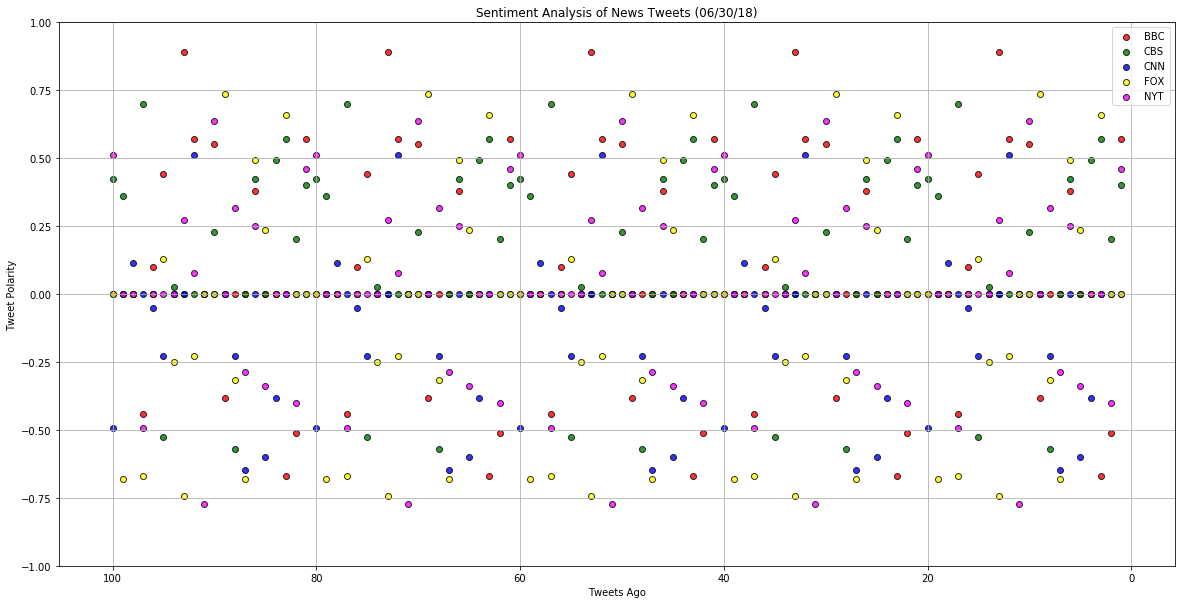

In [20]:
plt.figure(figsize = (20, 10))

bbc_scatter = plt.scatter(x_axis, bbc_comp, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="BBC", c='red')
cbs_scatter = plt.scatter(x_axis, cbs_comp, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="CBS", c='green')
cnn_scatter = plt.scatter(x_axis, cnn_comp, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="CNN", c='blue')
fox_scatter = plt.scatter(x_axis, fox_comp, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="FOX", c='yellow')
nyt_scatter = plt.scatter(x_axis, nyt_comp, edgecolor = "black", linewidths=1, marker="o", alpha=0.8, label="NYT", c='magenta')

plt.xticks(range(0, 101, 20),range(100, -1, -20))
plt.title("Sentiment Analysis of News Tweets ({})".format(time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.ylim([-1, 1])
plt.legend(loc='best')
plt.show()

In [21]:
plt.savefig("twitter_news_vader_scatterplot.png")

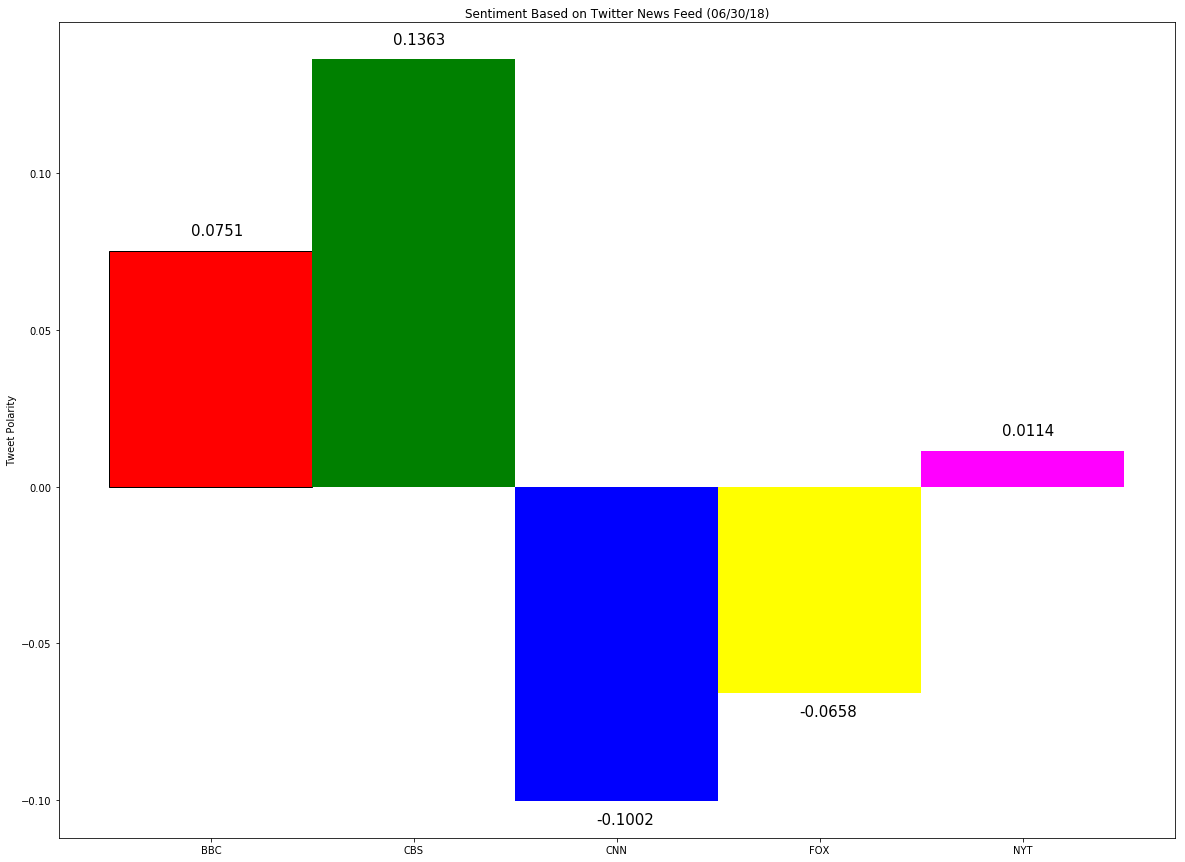

In [22]:
plt.figure(figsize=(20, 15))

vader_mean = [np.mean(bbc_comp), 
              np.mean(cbs_comp), 
              np.mean(cnn_comp),
              np.mean(fox_comp),
              np.mean(nyt_comp)]

plt.bar(range(len(vader_mean)), vader_mean, 1, align = 'center', edgecolor = 'black', color = ['red','green','blue','yellow','magenta'], tick_label = ['BBC', 'CBS', 'CNN', 'FOX','NYT'])

for i in range(len(vader_mean)):
    if vader_mean[i] > 0:
        plt.text(i - 0.1, vader_mean[i] + 0.005, np.around(vader_mean[i], decimals = 4), color='black', fontsize = 15)
    else:
        plt.text(i - 0.1, vader_mean[i] - 0.0075, np.around(vader_mean[i], decimals = 4), color='black', fontsize = 15)

plt.title("Sentiment Based on Twitter News Feed ({})".format(time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.show()

In [23]:
plt.savefig("twitter_news_vader_avg_bargraph.png")